# Conversion Rate Challenge
## Objectif
Optimiser des taux de conversion est une des tâches les plus importantes d'un data scientist.

C'est pourquoi, nous allons construire un modèle qui va prédire le taux de conversion de clients sur un site web et faire des recommandations à notre équipe marketing pour pouvoir augmenter notre revenu.

## Description du challenge
Nous avons récolté des données à propos d'utilisateurs du site d'une entreprise anonyme. Le projet est de :

- créer un modèle de prédiction du taux de conversion (l'utilisateur va-t-il convertir ou non?).

- trouver des recommandations à faire pour l'équipe Produit & Marketing afin qu'ils puissent améliorer ce taux de conversion.

## Données
Les données se trouvent dans le dataset -- conversion_data.csv

## Preprocessing

In [1]:
#intégration des librairies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#importation du dataset
df=pd.read_csv("conversion_data.csv")

In [3]:
#forme du dataset
df.shape

(316200, 6)

In [4]:
#visualisation des premières lignes
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
#on enlève la colonne "new_user" car l'information n'est pas très utile 
#pour Google Analytics, une session se termine après 30 min d'inactivité
df=df.drop(columns=['new_user'])

In [6]:
#pas de valeurs manquantes, mais des valeurs aberrantes pour l'age
df.describe()

,age,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000
mean,30.569858,4.872966,0.032258
std,8.271802,3.341104,0.176685
min,17.000000,1.000000,0.000000
25%,24.000000,2.000000,0.000000
50%,30.000000,4.000000,0.000000
75%,36.000000,7.000000,0.000000
max,123.000000,29.000000,1.000000


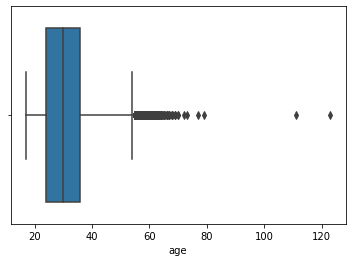

In [7]:
#visualiser les differentes variables
sns.boxplot(x=df['age'])

In [8]:
#enlever les outliers
df=df[df['age']<70]

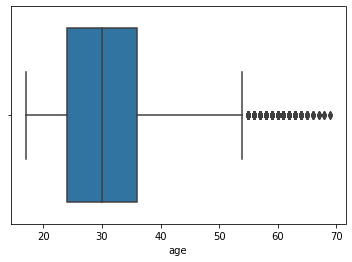

In [9]:
#visualiser les differentes variables
sns.boxplot(x=df['age'])

In [10]:
bins_age=[0,20,25,30,35,40,45,np.inf]
                  
category_age=(">20","20-25 ","25-30","30-35","35-40","40-45","45+")

df["bin_age"] = pd.cut(df["age"],bins_age,labels=category_age)

In [11]:
df.head()

,country,age,source,total_pages_visited,converted,bin_age
0,UK,25,Ads,1,0,20-25
1,US,23,Seo,5,0,20-25
2,US,28,Seo,4,0,25-30
3,China,39,Seo,5,0,35-40
4,US,30,Seo,6,0,25-30


In [12]:
#nous avons enlevé 8 lignes soit 0,0025% du dataset
df.describe()

,age,total_pages_visited,converted
count,316192.000000,316192.000000,316192.000000
mean,30.568496,4.872922,0.032253
std,8.266908,3.341069,0.176670
min,17.000000,1.000000,0.000000
25%,24.000000,2.000000,0.000000
50%,30.000000,4.000000,0.000000
75%,36.000000,7.000000,0.000000
max,69.000000,29.000000,1.000000


## Analyse des données

### Age

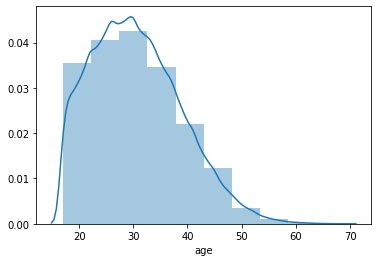

In [13]:
#distribution de l'age
sns.distplot(df.iloc[:,1],bins=10)

**La plupart des personnes présentes dans le dataset a moins de 40 ans.** 

## Source

Seo       0.490329
Ads       0.280643
Direct    0.229029
Name: source, dtype: float64


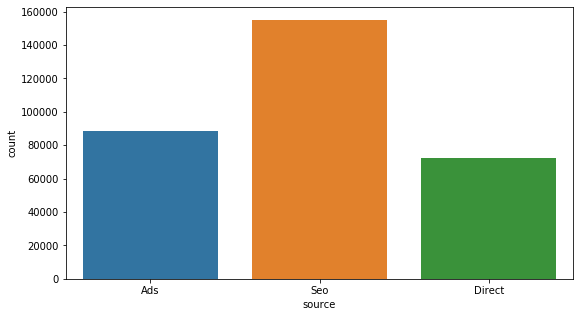

In [14]:
#compter les différentes valeurs par source
print(df.source.value_counts(normalize=True))
plt.figure(figsize=(20,5))
plt.subplot(121) 
sns.countplot(df.source)

**Le trafic provient principalement des moteurs de recherche (SEO) puis de la publicité (SEA) et enfin par l'adresse directe du site web (URL)**

## Pays

US         0.563224
China      0.242264
UK         0.153223
Germany    0.041288
Name: country, dtype: float64


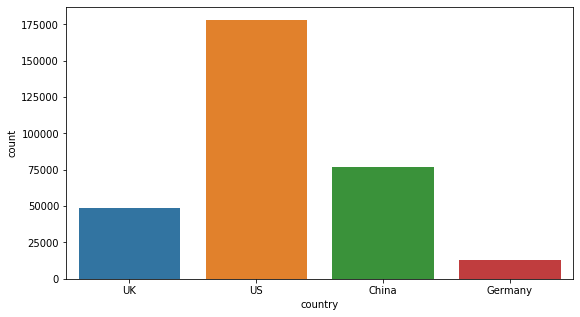

In [15]:
#compter les différentes valeurs par source
print(df.country.value_counts(normalize=True))
plt.figure(figsize=(20,5))
plt.subplot(121) 
sns.countplot(df.country)

**Le trafic provient principalement des USA et le reste, de la Chine, le UK et l'Allemagne** 

# CONVERSION

Nous allons observer les impacts des différentes variables pour la variable target "converted"=1 (achat sur le site).
Le taux de conversion global est de 3.2 % (10198/318192)

In [16]:
#nouveau dataset
conversion=df[df['converted']==1]
conversion.shape

(10198, 6)

US         0.660129
UK         0.249951
Germany    0.079918
China      0.010002
Name: country, dtype: float64


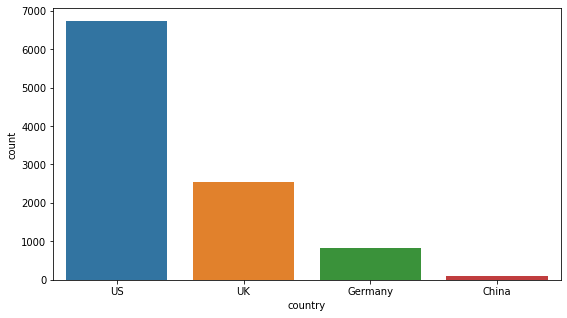

In [17]:
#impact du pays
plt.figure(figsize=(20,5))
plt.subplot(121) 
sns.countplot(conversion.country)

print(conversion.country.value_counts(normalize=True))

Seo       0.500000
Ads       0.299961
Direct    0.200039
Name: source, dtype: float64


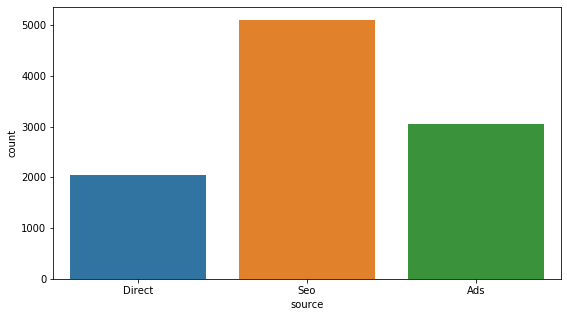

In [18]:
#impact de la source
plt.figure(figsize=(20,5))
plt.subplot(121) 
sns.countplot(conversion.source)

print(conversion.source.value_counts(normalize=True))

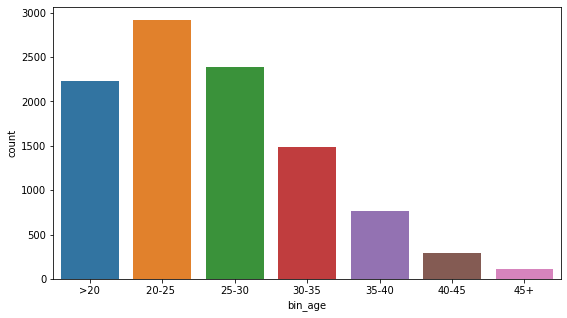

In [19]:
#impact de l'age
plt.figure(figsize=(20,5))
plt.subplot(121) 
sns.countplot(conversion.bin_age)

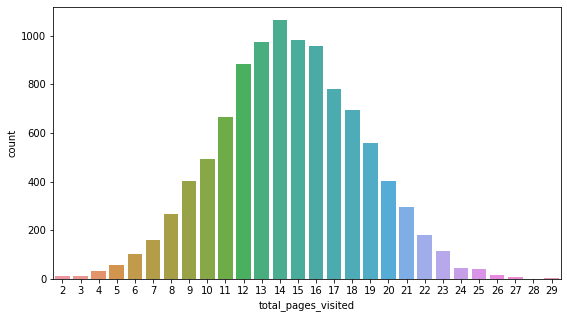

In [20]:
#impact du nombre de pages visitées
plt.figure(figsize=(20,5))
plt.subplot(121) 
sns.countplot(conversion.total_pages_visited)

**Parmi tous les visiteurs du site, voici les variables les plus fréquentes parmi ceux qui ont converti:**
- pays: principalement les US et le UK
- source: SEO (moteur de recherche) pour 50% suivi par les liens commerçaux (Ads) et l'accès direct
- age: moins de 35 ans
- nombre de pages vues: entre 6 et 23, donc très intéressés par le contenu du site

# Machine Learning
Objectif de créer un modèle de prédiction du taux de conversion (l'utilisateur va-t-il convertir ou non?).
<br> Le variable cible va prédire " converted " => 0 : non converti, 1 : converti

In [21]:
#suppression de la colonne bin_age
df = df.drop("bin_age",axis=1) 

In [22]:
#dummification des valeurs qualitatives
df=pd.get_dummies(df)

In [23]:
#voici le nouveau dataset
df

,age,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,0,0,0,1,0,1,0,0
1,23,5,0,0,0,0,1,0,0,1
2,28,4,0,0,0,0,1,0,0,1
3,39,5,0,1,0,0,0,0,0,1
4,30,6,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
316195,26,9,0,0,0,0,1,1,0,0
316196,27,6,0,0,0,0,1,0,1,0
316197,25,4,0,1,0,0,0,1,0,0
316198,22,4,0,0,0,0,1,0,0,1


Random over-sampling:
1    305994
0    305994
Name: converted, dtype: int64


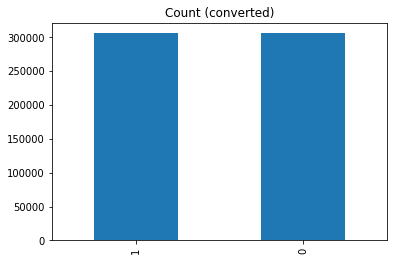

In [24]:
#le dataset est déséquilibré (3,2% vs 96,8%) donc l'oversampling va permettre de rééquilibrer

# calcul des 2 classes
count_class_0, count_class_1 = df.converted.value_counts()

# séparation des classes
df_class_0 = df[df['converted'] == 0]
df_class_1 = df[df['converted'] == 1]

#création d'un dataset équilibré
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
balanced_df = pd.concat([df_class_0, df_class_1_over], axis=0)

#Random over-sampling
print('Random over-sampling:')
print(balanced_df.converted.value_counts())

balanced_df.converted.value_counts().plot(kind='bar', title='Count (converted)');

In [25]:
balanced_df.shape

(611988, 10)

In [26]:
#séparation du dataset en X pour les variables explicatives et y pour la variable d'entraînement
X=balanced_df.drop(['converted'],axis=1)
y=balanced_df['converted']

In [27]:
#On sépare les données en échantillon d’apprentissage et échantillon de validation 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 42)

In [28]:
#on normalise les variables
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [29]:
#on utilise la régression logistique pour classer les données
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

In [30]:
#score sur votre échantillon de train
classifier.score(X_train, y_train)

0.933570947119018

In [31]:
#score sur votre échantillon de test
classifier.score(X_test, y_test)

0.9351214889132176

**pas d'over ou under fitting**

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

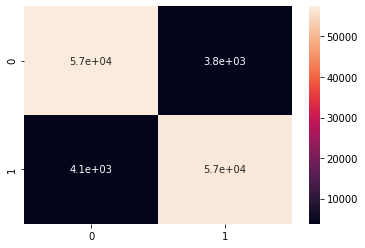

In [34]:
#matrice de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [35]:
y_test.shape

(122398,)

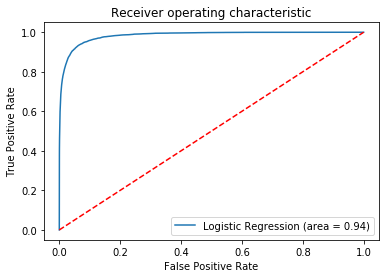

In [36]:
#On affiche la courbe ROC du modèle pour les données de validation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

In [37]:
pd.DataFrame(dict(fpr=fpr, tpr=tpr, threshold=thresholds))

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.000082,1.000000
2,0.000000,0.000147,1.000000
3,0.000000,0.000261,1.000000
4,0.000000,0.000425,1.000000
...,...,...,...
6679,0.999902,1.000000,0.000013
6680,0.999918,1.000000,0.000012
6681,0.999951,1.000000,0.000011
6682,0.999967,1.000000,0.000010


In [38]:
logit_roc_auc

0.9351214889132174

# CONCLUSION ET RECOMMANDATION

**Le modèle de régression logistique permet de prévoir à près de 93% la probabilité de conversion ce qui est très bien**

**Les utilisateurs de moins de 35 ans de pays anglophones (US et UK) ont un taux de conversion élevé, les campagnes marketing devraient viser en priorité cette catégorie d'age. Cela se confirme par la source "Ads" déjà à un niveau de 30% pour les visiteurs ayant acheté sur le site.**

**Par conséquent, il faut mieux éviter les visiteurs chinois, nombreux mais qui convertissent peu. De même, les visiteurs allemands ont un bon taux de conversion mais sont peu nombreux. Il serait trop coûteux de traduire le site en allemand.**